Name : Lazarou_Papadopoulos_FinalProject_DataEng.ipynb

Programmers : Panagiotis Lazarou / Nikos Papadopoulos

E-mail : p.lazarou7@gmail.com / nik.papadopoulos@aueb.gr

Date Created : 17-18-19/06/2024

Description : The aim of this analysis is to analyze PPP and EIDL data combined with US Census's Business Survey data in order to see how the loans were distibuted across states. 

Data : PPP:https://data.sba.gov/dataset/ppp-foia EIDL:https://data.sba.gov/dataset/covid-19-eidl US Census's Business Survey:Provided by Professor Kechagias

The following code was created in VS Code using Python 3.12.4 on local resources of 16 GB of RAM and in order to be replicated it is important to have downloaded the previous mentioned data.
It is also important to change the paths when necessary (instructions given in comments before those commands).

In [1]:
import pandas as pd

In [2]:
# first select only the variables of interest
selected_columns = [ 'DateApproved', 'BorrowerState', 'InitialApprovalAmount', 'NAICSCode']
dtype_mapping = {
    'DateApproved': "object",
    'BorrowerState': "object",
    'InitialApprovalAmount': "float64",
    'NAICSCode': "str"
}

In [3]:
import os

In [4]:
# Define the folder path (in order to execute this you should change the path to the your local folder)
folder_path = "C:\\Users\\HP\\Desktop\\Data Engineering-Local\\CovidRecovery\\RawData"

output_folder = "C:\\Users\\HP\\Desktop\\Data Engineering-Local\\CovidRecovery\\RawData"

In [5]:
# Set display options to avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# create a function that loads the data but including only the variables of interest
def process_file(file_path, output_path):
    # Load the data with specified data types and only selected columns
    df = pd.read_csv(file_path, usecols=selected_columns)

    # Save the data of each file to a new CSV file without sampling
    df.to_csv(output_path, index=False)
    return df

results = []

# List of the files that I want
csv_files = [f"public_up_to_150k_{i}_230930.csv" for i in range(1, 13)]
csv_files = [os.path.join(folder_path, f) for f in csv_files]

# here new csv's are created in the output folder and each contains all observations but only the variables of interest
for file_path in csv_files:
    output_path = os.path.join(output_folder, f'edited_{os.path.basename(file_path)}')
    df = process_file(file_path, output_path)
    results.append(df)

# Concatenate all DataFrames in the results list into a single DataFrame
all_data_df = pd.concat(results, ignore_index=True)

# Remove rows with Na in BorrowerState and NAICSCode
all_data_df = all_data_df.dropna(subset=['BorrowerState'])
all_data_df = all_data_df.dropna(subset=['NAICSCode'])

# Ensure 'NAICSCode' is of string type
all_data_df['NAICSCode'] = all_data_df['NAICSCode'].astype(str)
# Slice the first 2 digits
all_data_df['NAICSCode'] = all_data_df['NAICSCode'].str[:2]

# Display information about the final dataset
print(all_data_df.info(memory_usage='deep'))
print(all_data_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 10373949 entries, 152 to 10499773
Data columns (total 4 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   DateApproved           object 
 1   BorrowerState          object 
 2   InitialApprovalAmount  float64
 3   NAICSCode              object 
dtypes: float64(1), object(3)
memory usage: 1.7 GB
None
    DateApproved BorrowerState  InitialApprovalAmount NAICSCode
152   06/02/2020            AE              27,400.00        54
153   05/14/2021            AE              20,000.00        81
154   02/06/2021            AE              13,125.00        54
155   04/13/2021            AE               3,462.00        56
156   03/25/2021            AK             149,997.00        72


In [7]:
# Create a new column 'LoanProgram' and set its value to 'PPP' for all rows
all_data_df['LoanProgram'] = 'PPP'

In [8]:
# Display the DataFrame to verify
print(all_data_df.head())

    DateApproved BorrowerState  InitialApprovalAmount NAICSCode LoanProgram
152   06/02/2020            AE              27,400.00        54         PPP
153   05/14/2021            AE              20,000.00        81         PPP
154   02/06/2021            AE              13,125.00        54         PPP
155   04/13/2021            AE               3,462.00        56         PPP
156   03/25/2021            AK             149,997.00        72         PPP


In [9]:
# Check for NAs
all_data_df.isna().any()

DateApproved             False
BorrowerState            False
InitialApprovalAmount    False
NAICSCode                False
LoanProgram              False
dtype: bool

In [ ]:
# Save the final concatenated DataFrame to a CSV file
#all_data_df.to_csv(os.path.join(output_folder, 'all_data.csv'), index=True)

### EIDL

In [10]:
selected_columns2 = [ 'ACTIONDATE', 'PRIMPLACEOFPERFORMANCECD', 'FACEVALUEOFDIRECTLOANORLOANGUARANTEE']

In [11]:
# Define the folder path (in order to execute this you should change the path to the your local folder)
folder_path2 = "C:\\Users\\HP\\Desktop\\Data Engineering-Local\\CovidRecovery\\EIDL"

output_folder2 = "C:\\Users\\HP\\Desktop\\Data Engineering-Local\\CovidRecovery\\EIDL"

In [12]:
# create a function that loads the data but including only the variables of interest
def process_file(file_path, output_path):
    # Load the data with specified data types and only selected columns
    df = pd.read_csv(file_path, usecols=selected_columns2)

    # Save the data of each file to a new CSV file without sampling
    df.to_csv(output_path, index=False)
    return df

results = []

# List of the files that I want
file_names = [
    'DATAACT_EIDL_LOANS_20200401-20200609.csv',
    'DATAACT_EIDL_LOANS_20200610-20200625.csv',
    'DATAACT_EIDL_LOANS_20200626-20200723.csv',
    'DATAACT_EIDL_LOANS_20200724-20201115.csv',
    'DATAACT_EIDL_LOANS_DMCS2.0.csv'
]
file_names = [os.path.join(folder_path2, f) for f in file_names]

# here new csv's are created in the output folder and each contains all observations but only the variables of interest
for file_path in file_names:
    output_path = os.path.join(output_folder, f'edited_{os.path.basename(file_path)}')
    df = process_file(file_path, output_path)
    results.append(df)

# Concatenate all DataFrames in the results list into a single DataFrame
all_eidl_df = pd.concat(results, ignore_index=True)


# Display information about the final dataset
print(all_eidl_df.info(memory_usage='deep'))
print(all_eidl_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766274 entries, 0 to 3766273
Data columns (total 3 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   ACTIONDATE                            float64
 1   PRIMPLACEOFPERFORMANCECD              object 
 2   FACEVALUEOFDIRECTLOANORLOANGUARANTEE  float64
dtypes: float64(2), object(1)
memory usage: 258.6 MB
None
     ACTIONDATE PRIMPLACEOFPERFORMANCECD  FACEVALUEOFDIRECTLOANORLOANGUARANTEE
0 20,200,514.00                  GA**121                             65,300.00
1 20,200,514.00                  ID**049                            150,000.00
2 20,200,511.00                  TX**439                            150,000.00
3 20,200,515.00                  CA**059                             48,700.00
4 20,200,512.00                  WI**043                            150,000.00


In [13]:
EIDL = all_eidl_df
EIDL["LoanProgram"] = 'EIDL'
EIDL.head()

,ACTIONDATE,PRIMPLACEOFPERFORMANCECD,FACEVALUEOFDIRECTLOANORLOANGUARANTEE,LoanProgram
0,"20,200,514.00",GA**121,"65,300.00",EIDL
1,"20,200,514.00",ID**049,"150,000.00",EIDL
2,"20,200,511.00",TX**439,"150,000.00",EIDL
3,"20,200,515.00",CA**059,"48,700.00",EIDL
4,"20,200,512.00",WI**043,"150,000.00",EIDL


In [14]:
# Extract the state code from PRIMPLACEOFPERFORMANCECD and create a new column 'State'
EIDL['PRIMPLACEOFPERFORMANCECD'] = EIDL['PRIMPLACEOFPERFORMANCECD'].str[:2]
EIDL = EIDL.rename(columns={'PRIMPLACEOFPERFORMANCECD': 'State'})

In [15]:
# Convert EIDL ACTIONDATE to a proper date format
EIDL['ACTIONDATE'] = pd.to_datetime(EIDL['ACTIONDATE'], format='%Y%m%d')
EIDL['ACTIONDATE'] = EIDL['ACTIONDATE'].dt.strftime('%m/%d/%Y')  # Convert to desired format

In [16]:
# Rename columns in EIDL to match the desired output structure
EIDL = EIDL.rename(columns={'FACEVALUEOFDIRECTLOANORLOANGUARANTEE': 'Amount', 'ACTIONDATE':'Date' })
EIDL.head()

,Date,State,Amount,LoanProgram
0,05/14/2020,GA,"65,300.00",EIDL
1,05/14/2020,ID,"150,000.00",EIDL
2,05/11/2020,TX,"150,000.00",EIDL
3,05/15/2020,CA,"48,700.00",EIDL
4,05/12/2020,WI,"150,000.00",EIDL


In [17]:
# Back to PPP data 
all_data_df.head()

,DateApproved,BorrowerState,InitialApprovalAmount,NAICSCode,LoanProgram
152,06/02/2020,AE,"27,400.00",54,PPP
153,05/14/2021,AE,"20,000.00",81,PPP
154,02/06/2021,AE,"13,125.00",54,PPP
155,04/13/2021,AE,"3,462.00",56,PPP
156,03/25/2021,AK,"149,997.00",72,PPP


In [18]:
# Rename the dataframe
PPP = all_data_df

In [19]:
# Select and rename columns in PPP to match the desired output structure
PPP = PPP.rename(columns={'DateApproved': 'Date', 'InitialApprovalAmount': 'Amount', 'BorrowerState': 'State'})


In [20]:
PPP.head()

,Date,State,Amount,NAICSCode,LoanProgram
152,06/02/2020,AE,"27,400.00",54,PPP
153,05/14/2021,AE,"20,000.00",81,PPP
154,02/06/2021,AE,"13,125.00",54,PPP
155,04/13/2021,AE,"3,462.00",56,PPP
156,03/25/2021,AK,"149,997.00",72,PPP


In [21]:
# Concatenate EIDL and PPP DataFrames
merged_df = pd.concat([PPP, EIDL], ignore_index=True)

# Fill NAICSCode for EIDL loans with NAs
merged_df['NAICSCode'] = merged_df['NAICSCode'].fillna('NA')

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
merged_df.head(-10)


,Date,State,Amount,NAICSCode,LoanProgram
0,06/02/2020,AE,"27,400.00",54,PPP
1,05/14/2021,AE,"20,000.00",81,PPP
2,02/06/2021,AE,"13,125.00",54,PPP
3,04/13/2021,AE,"3,462.00",56,PPP
4,03/25/2021,AK,"149,997.00",72,PPP
...,...,...,...,...,...
14140208,11/14/2020,GA,"20,000.00",NA,EIDL
14140209,11/14/2020,FL,"19,800.00",NA,EIDL
14140210,11/14/2020,ME,"8,800.00",NA,EIDL
14140211,11/14/2020,NY,"95,000.00",NA,EIDL


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14140223 entries, 0 to 14140222
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Date         object 
 1   State        object 
 2   Amount       float64
 3   NAICSCode    object 
 4   LoanProgram  object 
dtypes: float64(1), object(4)
memory usage: 539.4+ MB


### Task 3

In [23]:
# Group by State and calculate total number of loans and total amount
state_summary = merged_df.groupby('State').agg({
    'Amount': ['count', 'sum']
}).reset_index()

# Flatten the multi-level column index
state_summary.columns = state_summary.columns.droplevel(level=0)
state_summary.columns = ['State', 'count', 'sum']

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # None means unlimited rows

# Remove rows where State is '59' or '73'
state_summary = state_summary[~state_summary['State'].isin(['59', '73'])]
# Reset index to start from 0
state_summary.reset_index(drop=True, inplace=True)

# Display the results
print("Summary by State:")
print(state_summary)

Summary by State:
   State    count               sum
0     AE        4         63,987.00
1     AK    28806  1,154,265,237.20
2     AL   203783  5,832,230,468.08
3     AR   118162  3,249,725,461.56
4     AS      454     17,790,749.95
5     AZ   214552  7,464,319,711.52
6     CA  1688554 67,695,583,631.50
7     CO   229347  8,237,556,375.83
8     CT   139811  5,264,856,363.97
9     DC    34725  1,361,526,814.28
10    DE    34204  1,241,510,137.73
11    FI        1         42,100.00
12    FL  1381744 42,289,835,665.29
13    GA   708682 19,673,134,017.86
14    GU     4481    181,618,639.34
15    HI    58776  2,227,632,119.04
16    IA   181527  4,453,086,595.49
17    ID    60274  2,046,776,912.54
18    IL   719271 21,024,381,910.48
19    IN   209338  6,539,891,149.33
20    KS   137546  3,732,907,201.11
21    KY   144036  4,038,026,966.70
22    LA   270988  7,942,116,881.56
23    MA   250812  9,756,090,919.88
24    MD   238056  8,321,279,924.39
25    ME    53798  1,766,110,858.27
26    MI  

In [24]:
# Group by NAICSCode and calculate total number of loans and total amount
naics_summary = merged_df.groupby('NAICSCode').agg({
    'Amount': ['count', 'sum']
}).reset_index()

# Flatten the multi-level column index
naics_summary.columns = naics_summary.columns.droplevel(level=0)
naics_summary.columns = ['NAICSCode', 'count', 'sum']

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # None means unlimited rows

print("\nSummary by NAICS Code:")
print(naics_summary)


Summary by NAICS Code:
   NAICSCode    count                sum
0         11   663907  11,966,361,074.11
1         21    34704   1,165,125,153.81
2         22    11511     425,288,073.12
3         23   892677  27,549,222,815.46
4         31    81184   2,484,479,055.23
5         32    75001   2,979,264,540.24
6         33   187701   7,378,516,932.27
7         42   297660   9,755,995,921.94
8         44   522188  14,896,433,150.48
9         45   317972   7,194,365,901.69
10        48   765432  13,752,772,052.48
11        49   143664   1,716,829,680.20
12        51   127875   3,584,947,704.05
13        52   284045   7,558,935,070.77
14        53   487478  10,709,310,606.59
15        54  1184948  32,525,463,506.58
16        55    13796     436,499,814.75
17        56   574975  13,746,753,431.41
18        61   163869   4,196,841,776.62
19        62   875449  32,295,042,964.17
20        71   322843   7,216,679,872.13
21        72   694313  28,367,354,950.42
22        81  1541183  32,761,912

### US Census's Business Survey data

In [25]:
selected_columns3 = ['NAME','NAICS2017','NAICS2017_LABEL','YEAR','FIRMPDEMP','EMP','PAYANN']

In [26]:
business_survey_df = pd.read_csv("C:\\Users\\HP\Desktop\\Data Engineering-Local\\CovidRecovery\\EIDL\\ABSCS2021.AB2100CSA01-Data.csv",usecols=selected_columns3)
business_survey_df.info()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP\AppData\Local\Temp\ipykernel_12888\2962371241.py:1: SyntaxWarning: invalid escape sequence '\D'
  business_survey_df = pd.read_csv("C:\\Users\\HP\Desktop\\Data Engineering-Local\\CovidRecovery\\EIDL\\ABSCS2021.AB2100CSA01-Data.csv",usecols=selected_columns3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127399 entries, 0 to 127398
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   NAME             127399 non-null  object
 1   NAICS2017        127399 non-null  object
 2   NAICS2017_LABEL  127399 non-null  object
 3   YEAR             127399 non-null  object
 4   FIRMPDEMP        127399 non-null  object
 5   EMP              127399 non-null  object
 6   PAYANN           127399 non-null  object
dtypes: object(7)
memory usage: 6.8+ MB


C:\Users\HP\AppData\Local\Temp\ipykernel_12888\2962371241.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  business_survey_df = pd.read_csv("C:\\Users\\HP\Desktop\\Data Engineering-Local\\CovidRecovery\\EIDL\\ABSCS2021.AB2100CSA01-Data.csv",usecols=selected_columns3)


In [27]:
# Remove the first row and reset index
business_survey_df = business_survey_df.drop(business_survey_df.index[0]).reset_index(drop=True)

In [28]:
# 00 in NAICS code is total for all sectors but we want to check specifically each sector
# Filter out rows where NAICS2017 column contains '00'
business_survey_df = business_survey_df[~business_survey_df['NAICS2017'].str.contains('00')].reset_index(drop=True)

In [29]:
business_survey_df.head()

,NAME,NAICS2017,NAICS2017_LABEL,YEAR,FIRMPDEMP,EMP,PAYANN
0,Alabama,11(660),"Agriculture, forestry, fishing and hunting(660)",2021,859,8118,414327
1,Alabama,11(660),"Agriculture, forestry, fishing and hunting(660)",2021,S,500 to 999 employees,S
2,Alabama,11(660),"Agriculture, forestry, fishing and hunting(660)",2021,485,3730,184890
3,Alabama,11(660),"Agriculture, forestry, fishing and hunting(660)",2021,S,"1,000 to 2,499 employees",S
4,Alabama,11(660),"Agriculture, forestry, fishing and hunting(660)",2021,3,798,36341


In [31]:
nunique_names = business_survey_df['NAME'].nunique()
print(nunique_names)

51


In [32]:
# Dictionary mapping state names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Recode the STNAME column to abbreviations
business_survey_df['NAME'] = business_survey_df['NAME'].replace(state_abbreviations)

# Display the first few rows to verify the changes
print(business_survey_df.head())

  NAME NAICS2017                                  NAICS2017_LABEL  YEAR  \
0   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
1   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
2   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
3   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
4   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   

  FIRMPDEMP                       EMP  PAYANN  
0       859                      8118  414327  
1         S      500 to 999 employees       S  
2       485                      3730  184890  
3         S  1,000 to 2,499 employees       S  
4         3                       798   36341  


In [33]:
unique_names = business_survey_df['NAME'].unique()
print(unique_names)

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [34]:
# Remove rows that contain 'S' in any column 
business_survey_df_clean = business_survey_df[~business_survey_df.applymap(lambda x: x == 'S').any(axis=1)].reset_index(drop=True)

# Print the cleaned DataFrame
print(business_survey_df_clean.head())

  NAME NAICS2017                                  NAICS2017_LABEL  YEAR  \
0   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
1   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
2   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
3   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   
4   AL   11(660)  Agriculture, forestry, fishing and hunting(660)  2021   

  FIRMPDEMP   EMP  PAYANN  
0       859  8118  414327  
1       485  3730  184890  
2         3   798   36341  
3         3   798   36341  
4       771  5351  247751  


C:\Users\HP\AppData\Local\Temp\ipykernel_12888\1078235244.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  business_survey_df_clean = business_survey_df[~business_survey_df.applymap(lambda x: x == 'S').any(axis=1)].reset_index(drop=True)


In [35]:
business_survey_df_clean = business_survey_df_clean.rename(columns={'NAME': 'State','NAICS2017':'NAICSCode'})
business_survey_df_clean['NAICSCode'] = business_survey_df_clean['NAICSCode'].str[:2]

In [36]:
print(business_survey_df_clean.head())

  State NAICSCode                                  NAICS2017_LABEL  YEAR  \
0    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
1    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
2    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
3    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
4    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   

  FIRMPDEMP   EMP  PAYANN  
0       859  8118  414327  
1       485  3730  184890  
2         3   798   36341  
3         3   798   36341  
4       771  5351  247751  


In [37]:
# Ensure 'EMP' column is numeric
business_survey_df_clean['EMP'] = pd.to_numeric(business_survey_df_clean['EMP'], errors='coerce')

# Aggregate number of employees per state
emp_per_state = business_survey_df_clean.groupby('State')['EMP'].sum().reset_index()

# Print the aggregated DataFrame
print(emp_per_state)

   State        EMP
0     AK    1549493
1     AL   14843447
2     AR    9705373
3     AZ   24600464
4     CA  146858027
5     CO   21786638
6     CT   12562664
7     DC    2740845
8     DE    3010634
9     FL   83209317
10    GA   38075863
11    HI    4181283
12    IA   12712184
13    ID    6864166
14    IL   49859027
15    IN   24147816
16    KS   10952606
17    KY   13621638
18    LA   16704482
19    MA   27323678
20    MD   20916950
21    ME    3296037
22    MI   38963836
23    MN   22958230
24    MO   21192434
25    MS    8571013
26    MT    3562990
27    NC   36782292
28    ND    2021961
29    NE    7533828
30    NH    4703107
31    NJ   36975403
32    NM    4681822
33    NV   11184639
34    NY   76238407
35    OH   44090660
36    OK   12380294
37    OR   16337219
38    PA   47033768
39    RI    3349311
40    SC   17899262
41    SD    2895032
42    TN   23605576
43    TX  108577890
44    UT   14891243
45    VA   30817231
46    VT    1284923
47    WA   25856042
48    WI   23878503


In [38]:
# Aggregate number of employees per naics
emp_per_naics = business_survey_df_clean.groupby('NAICSCode')['EMP'].sum().reset_index()

# Print the aggregated DataFrame
print(emp_per_naics)

   NAICSCode        EMP
0         11    3029341
1         21    3746254
2         22    1893607
3         23  107634357
4         31  113050039
5         42   62583757
6         44  127326419
7         48   47027526
8         51   23797558
9         52   40196714
10        53   26924612
11        54  108607350
12        55   11953305
13        56  133337019
14        61   14085882
15        62  154982916
16        71   14793620
17        72  169737346
18        81   38202333
19        99     440214


In [39]:
state_summary = pd.DataFrame(state_summary)

In [40]:
# Merge the two datasets by 'State'
state_emp_merged_df = pd.merge(state_summary, emp_per_state, on='State')
state_emp_merged_df.head()

,State,count,sum,EMP
0,AK,28806,"1,154,265,237.20",1549493
1,AL,203783,"5,832,230,468.08",14843447
2,AR,118162,"3,249,725,461.56",9705373
3,AZ,214552,"7,464,319,711.52",24600464
4,CA,1688554,"67,695,583,631.50",146858027


In [41]:
# Normalized Number of loans per number of employees in each State 
state_emp_merged_df['Norm_counts'] = state_emp_merged_df['count'] / state_emp_merged_df['EMP'] 
print(state_emp_merged_df.head())

  State    count               sum        EMP  Norm_counts
0    AK    28806  1,154,265,237.20    1549493         0.02
1    AL   203783  5,832,230,468.08   14843447         0.01
2    AR   118162  3,249,725,461.56    9705373         0.01
3    AZ   214552  7,464,319,711.52   24600464         0.01
4    CA  1688554 67,695,583,631.50  146858027         0.01


In [80]:
# Normalized Total Amount per number of employees in each State 
state_emp_merged_df['Norm_amount'] = state_emp_merged_df['sum'] / state_emp_merged_df['EMP'] 
print(state_emp_merged_df.sort_values(by='Norm_amount', ascending=False).head(5))

   State  count              sum      EMP  Norm_counts  Norm_amount
28    ND  54654 1,526,292,352.49  2021961         0.03       754.86
46    VT  25951   963,430,555.66  1284923         0.02       749.80
0     AK  28806 1,154,265,237.20  1549493         0.02       744.93
41    SD  69460 1,769,270,558.67  2895032         0.02       611.14
21    ME  53798 1,766,110,858.27  3296037         0.02       535.83


In [93]:
print(state_emp_merged_df)

   State    count               sum        EMP  Norm_counts  Norm_amount
0     AK    28806  1,154,265,237.20    1549493         0.02       744.93
1     AL   203783  5,832,230,468.08   14843447         0.01       392.92
2     AR   118162  3,249,725,461.56    9705373         0.01       334.84
3     AZ   214552  7,464,319,711.52   24600464         0.01       303.42
4     CA  1688554 67,695,583,631.50  146858027         0.01       460.96
5     CO   229347  8,237,556,375.83   21786638         0.01       378.10
6     CT   139811  5,264,856,363.97   12562664         0.01       419.09
7     DC    34725  1,361,526,814.28    2740845         0.01       496.75
8     DE    34204  1,241,510,137.73    3010634         0.01       412.37
9     FL  1381744 42,289,835,665.29   83209317         0.02       508.23
10    GA   708682 19,673,134,017.86   38075863         0.02       516.68
11    HI    58776  2,227,632,119.04    4181283         0.01       532.76
12    IA   181527  4,453,086,595.49   12712184     

In [43]:
naics_summary_summary = pd.DataFrame(naics_summary)

In [44]:
# Merge the two datasets by 'NAICSCode'
naics_emp_merged_df = pd.merge(naics_summary, emp_per_naics, on='NAICSCode')
naics_emp_merged_df.head()

,NAICSCode,count,sum,EMP
0,11,663907,"11,966,361,074.11",3029341
1,21,34704,"1,165,125,153.81",3746254
2,22,11511,"425,288,073.12",1893607
3,23,892677,"27,549,222,815.46",107634357
4,31,81184,"2,484,479,055.23",113050039


In [45]:
# Normalized Total Amount per number of employees per NAIC 
naics_emp_merged_df['Norm_amount'] = naics_emp_merged_df['sum'] / naics_emp_merged_df['EMP'] 
print(naics_emp_merged_df)

   NAICSCode    count               sum        EMP  Norm_amount
0         11   663907 11,966,361,074.11    3029341     3,950.15
1         21    34704  1,165,125,153.81    3746254       311.01
2         22    11511    425,288,073.12    1893607       224.59
3         23   892677 27,549,222,815.46  107634357       255.95
4         31    81184  2,484,479,055.23  113050039        21.98
5         42   297660  9,755,995,921.94   62583757       155.89
6         44   522188 14,896,433,150.48  127326419       116.99
7         48   765432 13,752,772,052.48   47027526       292.44
8         51   127875  3,584,947,704.05   23797558       150.64
9         52   284045  7,558,935,070.77   40196714       188.05
10        53   487478 10,709,310,606.59   26924612       397.75
11        54  1184948 32,525,463,506.58  108607350       299.48
12        55    13796    436,499,814.75   11953305        36.52
13        56   574975 13,746,753,431.41  133337019       103.10
14        61   163869  4,196,841,776.62 

### Heatmaps

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Shapefile from US Census (link to download: https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip)
shapefile_path = "C:\\Users\\HP\\Desktop\\Data Engineering Project\\shapefile"
us_states = gpd.read_file(shapefile_path)

In [48]:
# Clean State column in state_emp_merged_df to match STUSPS format
state_emp_merged_df['State'] = state_emp_merged_df['State'].str.split('-').str[-1]


In [49]:
# Merge shapefile with DataFrame based on cleaned State column
merged_data = us_states.merge(state_emp_merged_df, left_on='STUSPS', right_on='State', how='left')

# Print head of merged_data to inspect merged result
print("\nMerged Data head:")
print(merged_data.head())


Merged Data head:
  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry State      count  \
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...    MS 164,569.00   
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...    NC 328,083.00   
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...    OK 178,421.00   
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...    VA 271,708.00   
4 

In [50]:
print(merged_data.isna().any())

STATEFP        False
STATENS        False
AFFGEOID       False
GEOID          False
STUSPS         False
NAME           False
LSAD           False
ALAND          False
AWATER         False
geometry       False
State           True
count           True
sum             True
EMP             True
Norm_counts     True
Norm_amount     True
dtype: bool


In [51]:
from adjustText import adjust_text

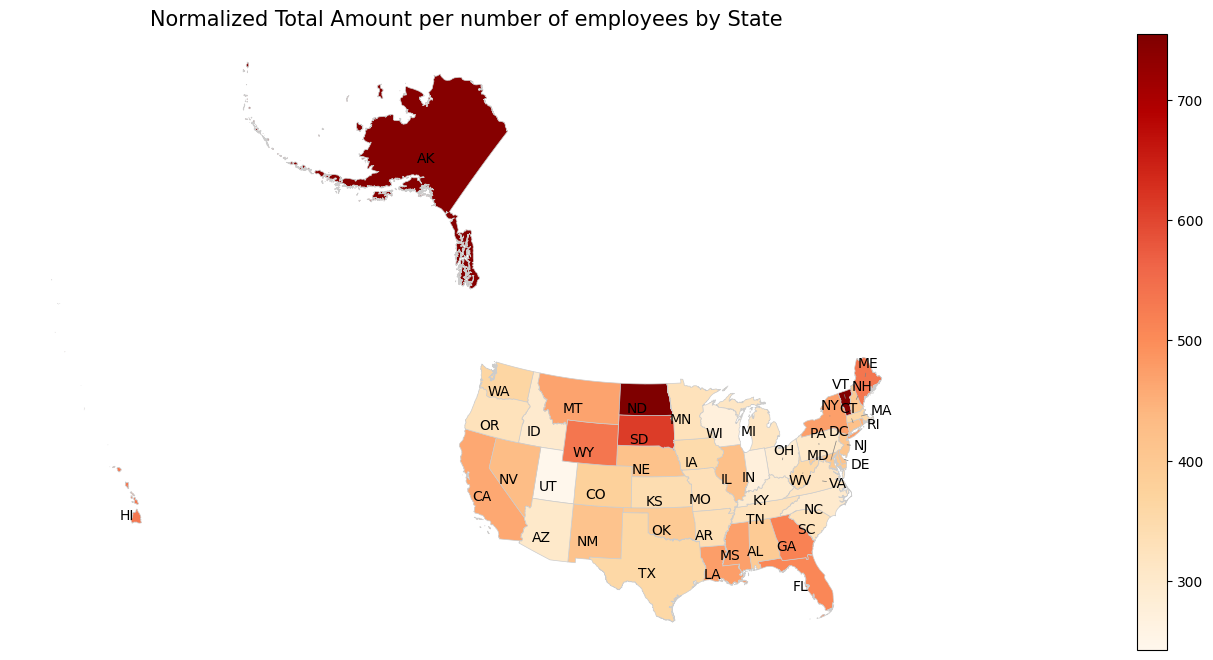

In [88]:
# Re-project geometries to a projected CRS
merged_data = merged_data.to_crs(epsg=2163)  # Using US National Atlas Equal Area projection

# Remove states MP, GU, PR, VI, AS
merged_data_filtered = merged_data[~merged_data['STUSPS'].isin(['MP', 'GU', 'PR', 'VI', 'AS'])]

# Plot heatmap (choropleth map)
fig, ax = plt.subplots(figsize=(55, 8))  
ax.set_aspect('equal') 

merged_data_filtered.plot(column='Norm_amount', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)

# Add state abbreviations as annotations
texts = []
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['STUSPS']):
    texts.append(ax.text(x, y, label, fontsize=10, ha='center', va='center'))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

# Customize plot
ax.set_title('Normalized Total Amount per number of employees by State', fontsize=15)
ax.set_axis_off()

plt.show()

### Barplot for NAICS code

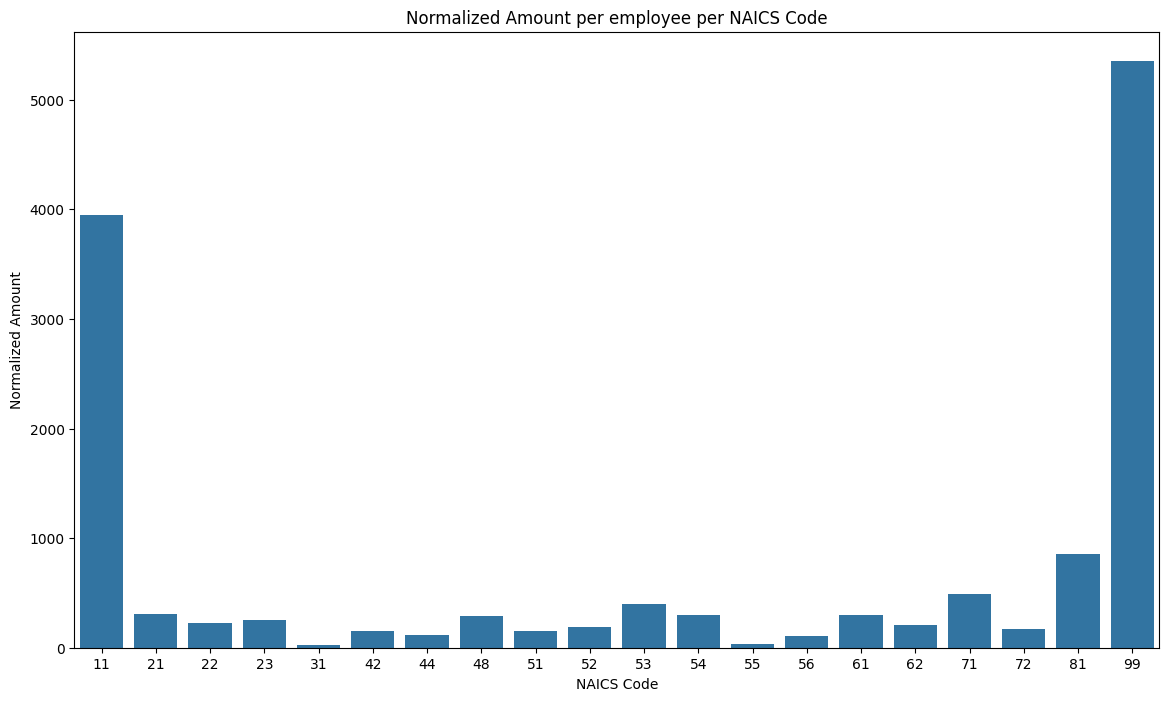

In [55]:
# Bar plot for Norm_amount per employee per NAICSCode
plt.figure(figsize=(14, 8))
sns.barplot(x='NAICSCode', y='Norm_amount', data=naics_emp_merged_df)

# Customize plot
plt.title('Normalized Amount per employee per NAICS Code')
plt.xlabel('NAICS Code')
plt.ylabel('Normalized Amount')

plt.show()

In [56]:
unique_naics_codes_per_label = business_survey_df_clean.groupby('NAICS2017_LABEL')['NAICSCode'].unique()

# Convert to a dictionary for easier viewing if necessary
unique_naics_codes_per_label_dict = unique_naics_codes_per_label.to_dict()

# Print the unique NAICSCode values for each NAICS2017_LABEL
for label, codes in unique_naics_codes_per_label_dict.items():
    print(f"NAICS2017_LABEL: {label}")
    print(f"NAICSCode: {codes}\n")

NAICS2017_LABEL: Accommodation and food services
NAICSCode: ['72']

NAICS2017_LABEL: Administrative and support and waste management and remediation services
NAICSCode: ['56']

NAICS2017_LABEL: Agriculture, forestry, fishing and hunting(660)
NAICSCode: ['11']

NAICS2017_LABEL: Arts, entertainment, and recreation
NAICSCode: ['71']

NAICS2017_LABEL: Construction
NAICSCode: ['23']

NAICS2017_LABEL: Educational services
NAICSCode: ['61']

NAICS2017_LABEL: Finance and insurance(662)
NAICSCode: ['52']

NAICS2017_LABEL: Health care and social assistance
NAICSCode: ['62']

NAICS2017_LABEL: Industries not classified
NAICSCode: ['99']

NAICS2017_LABEL: Information
NAICSCode: ['51']

NAICS2017_LABEL: Management of companies and enterprises
NAICSCode: ['55']

NAICS2017_LABEL: Manufacturing
NAICSCode: ['31']

NAICS2017_LABEL: Mining, quarrying, and oil and gas extraction
NAICSCode: ['21']

NAICS2017_LABEL: Other services (except public administration)(663)
NAICSCode: ['81']

NAICS2017_LABEL: Profes

In [57]:
print(business_survey_df_clean.head())

  State NAICSCode                                  NAICS2017_LABEL  YEAR  \
0    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
1    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
2    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
3    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   
4    AL        11  Agriculture, forestry, fishing and hunting(660)  2021   

  FIRMPDEMP   EMP  PAYANN  
0       859  8118  414327  
1       485  3730  184890  
2         3   798   36341  
3         3   798   36341  
4       771  5351  247751  


In [58]:
# Ensure 'FIRMPDEMP' column is numeric
business_survey_df_clean['FIRMPDEMP'] = pd.to_numeric(business_survey_df_clean['FIRMPDEMP'], errors='coerce')

# Aggregate number of employees per state
business_per_state = business_survey_df_clean.groupby('State')['FIRMPDEMP'].sum().reset_index()

# Print the aggregated DataFrame
print(business_per_state)

   State  FIRMPDEMP
0     AK     192154
1     AL     922469
2     AR     752843
3     AZ    1898025
4     CA   13963673
5     CO    2321400
6     CT    1069314
7     DC     200754
8     DE     278895
9     FL    8717509
10    GA    3244244
11    HI     302927
12    IA     948901
13    ID     699100
14    IL    4236168
15    IN    1573134
16    KS     849567
17    KY     882420
18    LA    1193096
19    MA    2256083
20    MD    1643622
21    ME     336766
22    MI    2849682
23    MN    1844848
24    MO    1761122
25    MS     611396
26    MT     500651
27    NC    3116051
28    ND     218001
29    NE     627912
30    NH     422134
31    NJ    3280883
32    NM     405443
33    NV     903174
34    NY    7631846
35    OH    2979024
36    OK    1071262
37    OR    1490544
38    PA    3592839
39    RI     306304
40    SC    1384533
41    SD     300320
42    TN    1555444
43    TX    8076740
44    UT    1243731
45    VA    2462924
46    VT     157908
47    WA    2521900
48    WI    1658176


In [59]:
# Merge the two datasets by 'State'
state_business_merged_df = pd.merge(state_summary, business_per_state, on='State')
state_business_merged_df.head()

,State,count,sum,FIRMPDEMP
0,AK,28806,"1,154,265,237.20",192154
1,AL,203783,"5,832,230,468.08",922469
2,AR,118162,"3,249,725,461.56",752843
3,AZ,214552,"7,464,319,711.52",1898025
4,CA,1688554,"67,695,583,631.50",13963673


In [60]:
# Normalized Number of loans per number of businesses in each State 
state_business_merged_df['Norm_counts'] = state_business_merged_df['count'] / state_business_merged_df['FIRMPDEMP']

In [63]:
state_business_merged_df.head()

,State,count,sum,FIRMPDEMP,Norm_counts
0,AK,28806,"1,154,265,237.20",192154,0.15
1,AL,203783,"5,832,230,468.08",922469,0.22
2,AR,118162,"3,249,725,461.56",752843,0.16
3,AZ,214552,"7,464,319,711.52",1898025,0.11
4,CA,1688554,"67,695,583,631.50",13963673,0.12


In [89]:
# Normalized Total Amount per number of businesses in each State 
state_business_merged_df['Norm_amount'] = state_business_merged_df['sum'] / state_business_merged_df['FIRMPDEMP'] 
print(state_business_merged_df.sort_values(by='Norm_counts', ascending=False).head(-10))

   State    count               sum  FIRMPDEMP  Norm_counts  Norm_amount
25    MS   164569  4,047,867,652.99     611396         0.27     6,620.70
28    ND    54654  1,526,292,352.49     218001         0.25     7,001.31
41    SD    69460  1,769,270,558.67     300320         0.23     5,891.28
18    LA   270988  7,942,116,881.56    1193096         0.23     6,656.73
1     AL   203783  5,832,230,468.08     922469         0.22     6,322.41
10    GA   708682 19,673,134,017.86    3244244         0.22     6,064.01
29    NE   123274  3,144,223,060.22     627912         0.20     5,007.43
11    HI    58776  2,227,632,119.04     302927         0.19     7,353.69
12    IA   181527  4,453,086,595.49     948901         0.19     4,692.89
7     DC    34725  1,361,526,814.28     200754         0.17     6,782.07
42    TN   268071  7,700,271,692.78    1555444         0.17     4,950.53
14    IL   719271 21,024,381,910.48    4236168         0.17     4,963.07
36    OK   178421  4,894,116,846.36    1071262     

### Heatmap for number of businesses

In [65]:
# Shapefile from US Census (link to download: https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip)
shapefile_path = "C:\\Users\\HP\\Desktop\\Data Engineering Project\\shapefile"
us_states = gpd.read_file(shapefile_path)

In [66]:
# Clean State column in state_emp_merged_df to match STUSPS format
state_business_merged_df['State'] = state_business_merged_df['State'].str.split('-').str[-1]

In [67]:
# Merge shapefile with DataFrame based on cleaned State column
merged_data2 = us_states.merge(state_business_merged_df, left_on='STUSPS', right_on='State', how='left')
# Print head of merged_data2 to inspect merged result
print("\nMerged Data head:")
print(merged_data2.head())


Merged Data head:
  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry State      count  \
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...    MS 164,569.00   
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...    NC 328,083.00   
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...    OK 178,421.00   
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...    VA 271,708.00   
4 

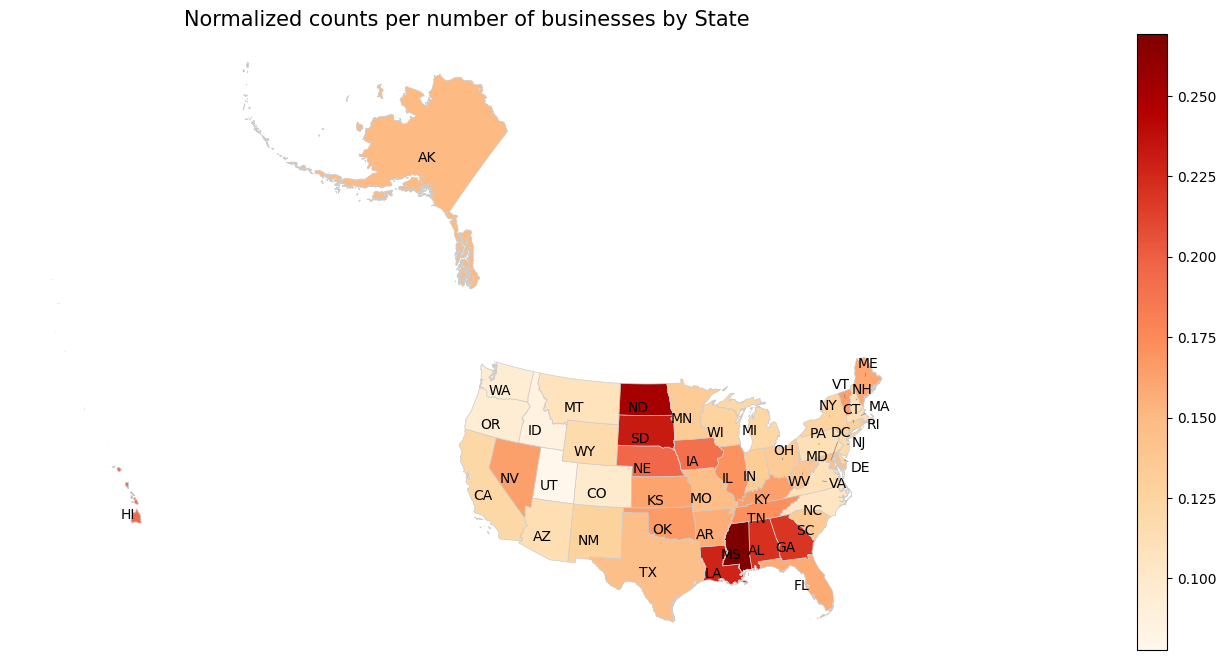

In [86]:
# Re-project geometries to a projected CRS
merged_data2 = merged_data2.to_crs(epsg=2163)  # Using US National Atlas Equal Area projection

# Remove states MP, GU, PR, VI, AS
merged_data_filtered2 = merged_data2[~merged_data2['STUSPS'].isin(['MP', 'GU', 'PR', 'VI', 'AS'])]

# Plot heatmap (choropleth map)
fig, ax = plt.subplots(figsize=(55, 8))  
ax.set_aspect('equal') 

merged_data_filtered2.plot(column='Norm_counts', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)

# Add state abbreviations as annotations
texts = []
for x, y, label in zip(merged_data_filtered2.geometry.centroid.x, merged_data_filtered2.geometry.centroid.y, merged_data_filtered2['STUSPS']):
    texts.append(ax.text(x, y, label, fontsize=10, ha='center', va='center'))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

# Customize plot
ax.set_title('Normalized counts per number of businesses by State', fontsize=15)
ax.set_axis_off()

plt.show()

In [69]:
# Aggregate number of businesses per naics
business_per_naics = business_survey_df_clean.groupby('NAICSCode')['FIRMPDEMP'].sum().reset_index()
# Print the aggregated DataFrame
print(business_per_naics)


   NAICSCode  FIRMPDEMP
0         11     208843
1         21     261279
2         22      56298
3         23   13004341
4         31    4375778
5         42    5010463
6         44   11284004
7         48    3872816
8         51    1517715
9         52    3972046
10        53    5565913
11        54   15539874
12        55     229201
13        56    6239544
14        61     946549
15        62   11008593
16        71    1820267
17        72    9787031
18        81    7068233
19        99     211673


In [70]:
# Merge the two datasets by 'NAICSCode'
naics_business_merged_df = pd.merge(naics_summary, business_per_naics, on='NAICSCode')
naics_business_merged_df.head()

,NAICSCode,count,sum,FIRMPDEMP
0,11,663907,"11,966,361,074.11",208843
1,21,34704,"1,165,125,153.81",261279
2,22,11511,"425,288,073.12",56298
3,23,892677,"27,549,222,815.46",13004341
4,31,81184,"2,484,479,055.23",4375778


In [75]:
# Normalized Total Amount per number of businesses per NAIC 
naics_business_merged_df['Norm_amount'] = naics_business_merged_df['sum'] / naics_business_merged_df['FIRMPDEMP'] 
print(naics_business_merged_df)

   NAICSCode    count               sum  FIRMPDEMP  Norm_amount
0         11   663907 11,966,361,074.11     208843    57,298.36
1         21    34704  1,165,125,153.81     261279     4,459.31
2         22    11511    425,288,073.12      56298     7,554.23
3         23   892677 27,549,222,815.46   13004341     2,118.46
4         31    81184  2,484,479,055.23    4375778       567.78
5         42   297660  9,755,995,921.94    5010463     1,947.12
6         44   522188 14,896,433,150.48   11284004     1,320.14
7         48   765432 13,752,772,052.48    3872816     3,551.10
8         51   127875  3,584,947,704.05    1517715     2,362.07
9         52   284045  7,558,935,070.77    3972046     1,903.03
10        53   487478 10,709,310,606.59    5565913     1,924.09
11        54  1184948 32,525,463,506.58   15539874     2,093.03
12        55    13796    436,499,814.75     229201     1,904.44
13        56   574975 13,746,753,431.41    6239544     2,203.17
14        61   163869  4,196,841,776.62 

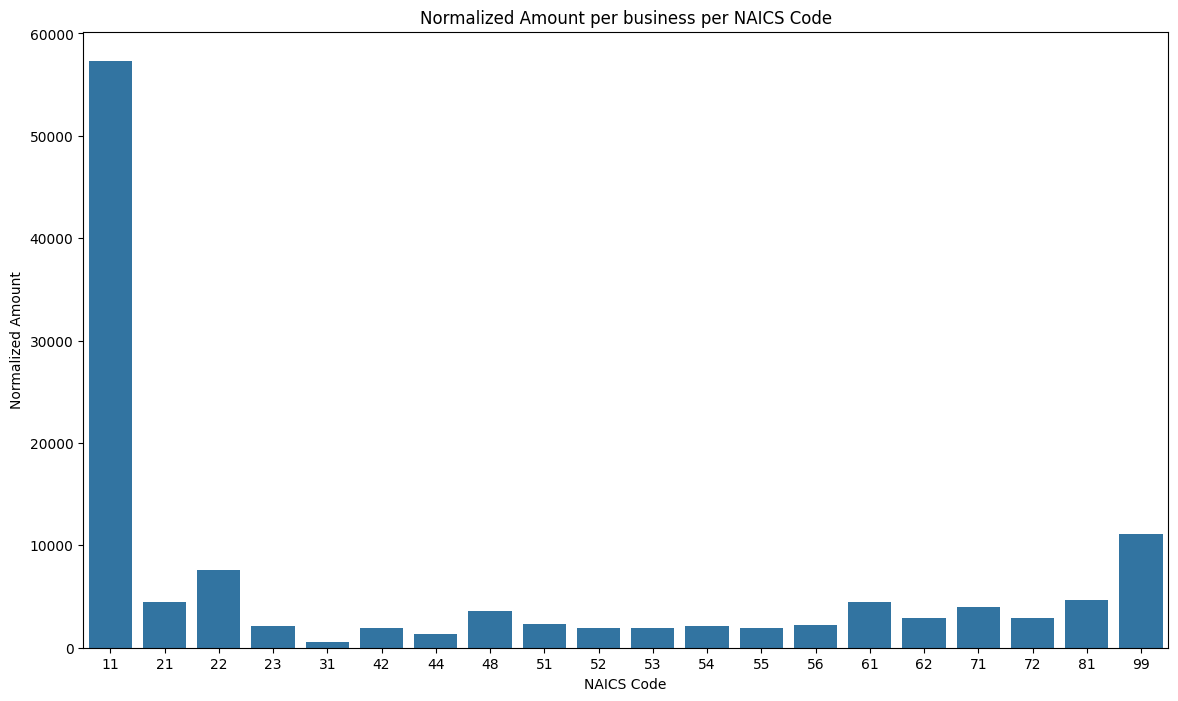

In [74]:
# Bar plot for Norm_amount per business per NAICSCode
plt.figure(figsize=(14, 8))
sns.barplot(x='NAICSCode', y='Norm_amount', data=naics_business_merged_df)

# Customize plot
plt.title('Normalized Amount per business per NAICS Code')
plt.xlabel('NAICS Code')
plt.ylabel('Normalized Amount')

plt.show()

### Here we check the average employment in a business in each state

In [90]:
# Merge the two datasets by 'State'
business_agg = pd.merge(business_per_state, emp_per_state, on='State')
business_agg.head()

,State,FIRMPDEMP,EMP
0,AK,192154,1549493
1,AL,922469,14843447
2,AR,752843,9705373
3,AZ,1898025,24600464
4,CA,13963673,146858027


In [92]:
business_agg["average_emp"] = business_agg['EMP'] / business_agg['FIRMPDEMP']
print(business_agg)

   State  FIRMPDEMP        EMP  average_emp
0     AK     192154    1549493         8.06
1     AL     922469   14843447        16.09
2     AR     752843    9705373        12.89
3     AZ    1898025   24600464        12.96
4     CA   13963673  146858027        10.52
5     CO    2321400   21786638         9.39
6     CT    1069314   12562664        11.75
7     DC     200754    2740845        13.65
8     DE     278895    3010634        10.79
9     FL    8717509   83209317         9.55
10    GA    3244244   38075863        11.74
11    HI     302927    4181283        13.80
12    IA     948901   12712184        13.40
13    ID     699100    6864166         9.82
14    IL    4236168   49859027        11.77
15    IN    1573134   24147816        15.35
16    KS     849567   10952606        12.89
17    KY     882420   13621638        15.44
18    LA    1193096   16704482        14.00
19    MA    2256083   27323678        12.11
20    MD    1643622   20916950        12.73
21    ME     336766    3296037  